In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)

In [114]:
df = pd.read_csv("loan_training_data.csv")

In [115]:
data_dict = pd.read_csv("the_data_dictionary.csv")
data_dict

,dtypes,name,description
0,float64,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit ..."
1,object,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,float64,installment,The monthly payment owed by the borrower if the loan originates.
3,object,grade,LC assigned loan grade
4,object,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
5,object,home_ownership,The home ownership status provided by the borrower during registration or obtained from the cred...
6,float64,annual_inc,The self-reported annual income provided by the borrower during registration.
7,object,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
8,object,loan_status,Current status of the loan
9,object,purpose,A category provided by the borrower for the loan request.


In [116]:
df.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,15000.0,36 months,485.14,B,9 years,MORTGAGE,125000.0,Not Verified,1,debt_consolidation,17.22,0.0,11.0,37651.0,24.0,0.0,87483.0,58300.0,7953.0,53.6,2.0,0.0,2.0,7.0,2.0,8.0,7.0,0.0,1.0,87483.0,8500.0,45764.0,687.0
1,12250.0,60 months,295.37,C,7 years,RENT,35000.0,Source Verified,0,credit_card,19.51,0.0,9.0,12681.0,19.0,0.0,13938.0,19345.0,1742.0,69.1,0.0,0.0,5.0,5.0,7.0,16.0,5.0,0.0,1.0,13938.0,18345.0,14793.0,722.0
2,17000.0,36 months,556.48,B,10+ years,MORTGAGE,67000.0,Source Verified,1,debt_consolidation,21.26,0.0,14.0,27320.0,33.0,0.0,43035.0,43500.0,3074.0,66.2,1.0,0.0,4.0,6.0,6.0,12.0,6.0,0.0,0.0,43035.0,31800.0,27657.0,747.0
3,8250.0,36 months,263.01,B,9 years,OWN,29000.0,Not Verified,1,debt_consolidation,24.34,0.0,14.0,8253.0,22.0,0.0,46863.0,13600.0,3347.0,71.8,0.0,0.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,46863.0,11400.0,40279.0,702.0
4,7125.0,36 months,256.06,D,9 years,RENT,87000.0,Source Verified,0,house,13.92,2.0,12.0,2426.0,19.0,1215.0,22318.0,5400.0,1860.0,47.2,0.0,0.0,5.0,7.0,7.0,8.0,8.0,0.0,2.0,22318.0,4700.0,26334.0,677.0


In [119]:
X = df.drop("loan_status", axis=1)
y = df.loan_status
y.shape

(100000L,)

In [120]:
term_dummies = pd.get_dummies(X.term, prefix="term:")
grade_dummies = pd.get_dummies(X.grade, prefix="grade:")
home_dummies = pd.get_dummies(X.home_ownership, prefix="home:")
verified_dummies = pd.get_dummies(X.verification_status, prefix="verify:")
purpose_dummies = pd.get_dummies(X.purpose, prefix="purpose")
dummies = pd.concat([grade_dummies,home_dummies,purpose_dummies, term_dummies, verified_dummies], axis=1)
X.drop(["term", "grade", "home_ownership", "verification_status", "purpose"], axis=1, inplace=True)
X = pd.concat([X,dummies], axis=1)
X["emp_length"] = X.emp_length.str.replace(" years", "").str.replace(" year", "").str.replace("< 1", "0").str.replace("+", "").str.replace("n/a", "0")
X["emp_length"] = X.emp_length.astype(float)

In [121]:
X.head()

,loan_amnt,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,grade:_A,grade:_B,grade:_C,grade:_D,grade:_E,grade:_F,grade:_G,home:_MORTGAGE,home:_NONE,home:_OTHER,home:_OWN,home:_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term:_ 36 months,term:_ 60 months,verify:_Not Verified,verify:_Source Verified,verify:_Verified
0,15000.0,485.14,9.0,125000.0,17.22,0.0,11.0,37651.0,24.0,0.0,87483.0,58300.0,7953.0,53.6,2.0,0.0,2.0,7.0,2.0,8.0,7.0,0.0,1.0,87483.0,8500.0,45764.0,687.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,12250.0,295.37,7.0,35000.0,19.51,0.0,9.0,12681.0,19.0,0.0,13938.0,19345.0,1742.0,69.1,0.0,0.0,5.0,5.0,7.0,16.0,5.0,0.0,1.0,13938.0,18345.0,14793.0,722.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,17000.0,556.48,10.0,67000.0,21.26,0.0,14.0,27320.0,33.0,0.0,43035.0,43500.0,3074.0,66.2,1.0,0.0,4.0,6.0,6.0,12.0,6.0,0.0,0.0,43035.0,31800.0,27657.0,747.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,8250.0,263.01,9.0,29000.0,24.34,0.0,14.0,8253.0,22.0,0.0,46863.0,13600.0,3347.0,71.8,0.0,0.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,46863.0,11400.0,40279.0,702.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,7125.0,256.06,9.0,87000.0,13.92,2.0,12.0,2426.0,19.0,1215.0,22318.0,5400.0,1860.0,47.2,0.0,0.0,5.0,7.0,7.0,8.0,8.0,0.0,2.0,22318.0,4700.0,26334.0,677.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [122]:
np.size(X)

5700000

In [123]:
Xs_corr = X.corr()

In [124]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Xs = scale.fit_transform(Xs_corr)

In [125]:
## Fit the PCA and print the components
from sklearn.decomposition import PCA
Xs_pca = PCA().fit(Xs)
print "Number of PCA components is: \n", Xs_pca.n_components_
print "\n======\n"
print "List of PCA components is:\n", Xs_pca.components_

Number of PCA components is: 
57


List of PCA components is:
[[ -2.36176710e-01  -2.29989278e-01  -1.02350685e-01 ...,   1.56376386e-01
   -2.62413719e-02  -1.34216016e-01]
 [ -5.75856460e-02  -4.90152800e-02  -3.31559034e-02 ...,   1.26254576e-04
   -6.58775171e-03   5.53687601e-03]
 [ -1.44193560e-01  -1.04639970e-01  -3.95621939e-02 ...,   2.40750060e-01
   -1.10777237e-01  -1.46130070e-01]
 ..., 
 [  1.22698538e-12  -1.01399096e-12  -2.70009806e-14 ...,  -5.02927630e-01
   -4.31263132e-01  -5.01647051e-01]
 [ -7.95857368e-12   6.44867337e-12  -6.01970611e-14 ...,   3.34228870e-01
    2.86603043e-01   3.33377840e-01]
 [ -0.00000000e+00   1.70691461e-17   2.59770949e-16 ...,  -9.69345722e-05
   -8.31219140e-05  -9.66877526e-05]]


In [126]:
Xs_pcs = Xs_pca.transform(Xs)
Xs_pcs
np.size(Xs_pcs[1])

57

In [132]:
Xs_pcs_df = pd.DataFrame(Xs_pcs, columns=['PC'+str(i) for i in range(1, Xs_pcs.shape[1]+1)])
Xs_pcs_df['loan_status'] = y
Xs_pcs_df.head()
Xs_pcs_df['loan_status']
Xs_pcs_df.shape

(57, 58)

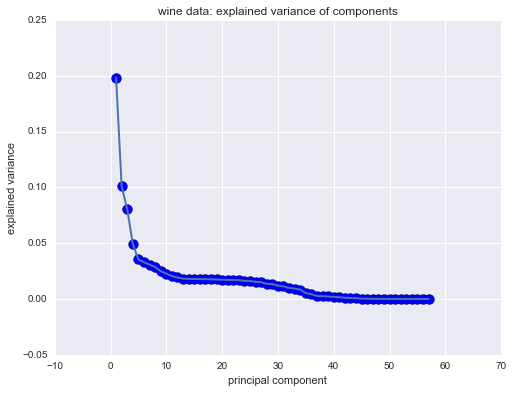

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, Xs.shape[1]+1), Xs_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, Xs.shape[1]+1), Xs_pca.explained_variance_ratio_, s=100)
ax.set_title('wine data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

In [22]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

In [23]:
Xs_pa = horn_parallel_analysis(Xs.shape, percentile=95)
Xs_pa

array([  4.09381639e+00,   3.66872607e+00,   3.37319356e+00,
         3.14354164e+00,   2.95998603e+00,   2.77440932e+00,
         2.62775418e+00,   2.47552783e+00,   2.33834453e+00,
         2.21421991e+00,   2.09058517e+00,   1.97850432e+00,
         1.87012606e+00,   1.77186649e+00,   1.67355182e+00,
         1.57656057e+00,   1.49043404e+00,   1.40565676e+00,
         1.32240507e+00,   1.24803408e+00,   1.17342199e+00,
         1.10634844e+00,   1.03598904e+00,   9.75541519e-01,
         9.07819560e-01,   8.45853214e-01,   7.87503091e-01,
         7.36312920e-01,   6.83847239e-01,   6.36466981e-01,
         5.91224841e-01,   5.45834411e-01,   5.03315911e-01,
         4.62419818e-01,   4.20968570e-01,   3.82385478e-01,
         3.48463031e-01,   3.11952459e-01,   2.80293689e-01,
         2.50738538e-01,   2.24408153e-01,   1.97574467e-01,
         1.72700957e-01,   1.49761850e-01,   1.29790286e-01,
         1.08131574e-01,   9.15378830e-02,   7.65520572e-02,
         6.11381916e-02,

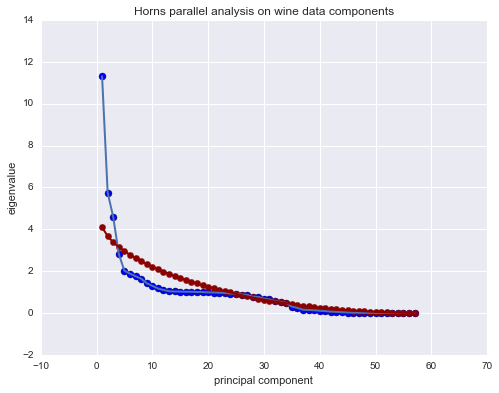

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, Xs.shape[1]+1), Xs_pca.explained_variance_, lw=2)
ax.scatter(range(1, Xs.shape[1]+1), Xs_pca.explained_variance_, s=50)

ax.plot(range(1, len(Xs_pa)+1), Xs_pa, lw=2, color='darkred')
ax.scatter(range(1, len(Xs_pa)+1), Xs_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on wine data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()

In [38]:
columns_ = Xs_pcs_df.columns.tolist()
ypc = Xs_pcs_df.loan_status.values
Xpc = Xs_pcs_df[[i for i in columns_ if i<'PC37']]
Xpc = Xpc.values
np.size(Xpc[0])

30

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
model = GradientBoostingClassifier(random_state=42)

In [41]:
model.fit(Xpc, ypc)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False)

In [53]:
ypc_prob_pred = model.predict_proba(Xpc)

In [60]:
#ypc_prob_pred

In [55]:
threshold_adjusted_preds = np.where(ypc_prob_pred>=0.5, 1, 0)

In [56]:
predictions = threshold_adjusted_preds[:,1]
predictions

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [57]:
from sklearn.metrics import confusion_matrix
#Profit calculator
def profit_calculator(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[1,1]
    fp = cm[0,1]
    return 100*tp - 1000*fp


In [58]:
profit_calculator(ypc, predictions)

4400

In [59]:
#WITH TEST DATA

In [96]:
dft = pd.read_csv("loan_testing_data.csv").sample(frac=.2, random_state=1234)
dft.shape

(10000, 33)

In [101]:
Xt = dft.drop("loan_status", axis=1)
yt = dft.loan_status

Xt.shape
yt.shape

(10000L,)

In [102]:
term_dummies_t = pd.get_dummies(Xt.term, prefix="term:")
grade_dummies_t = pd.get_dummies(Xt.grade, prefix="grade:")
home_dummies_t = pd.get_dummies(Xt.home_ownership, prefix="home:")
verified_dummies_t = pd.get_dummies(Xt.verification_status, prefix="verify:")
purpose_dummies_t = pd.get_dummies(Xt.purpose, prefix="purpose")
dummies_t = pd.concat([grade_dummies_t,home_dummies_t,purpose_dummies_t, term_dummies_t, verified_dummies_t], axis=1)
Xt.drop(["term", "grade", "home_ownership", "verification_status", "purpose"], axis=1, inplace=True)
Xt = pd.concat([Xt,dummies_t], axis=1)
Xt["emp_length"] = Xt.emp_length.str.replace(" years", "").str.replace(" year", "").str.replace("< 1", "0").str.replace("+", "").str.replace("n/a", "0")
Xt["emp_length"] = Xt.emp_length.astype(float)

In [103]:
for i in X.columns:
    if i not in Xt.columns:
        print i
for i in X.columns:
    if i not in Xt.columns:
        X.drop(i, axis=1, inplace=True)

In [104]:
import numpy as np
np.size(X.columns)

56

In [105]:
np.size(Xt.columns)

56

In [106]:
Xt_corr = Xt.corr()

In [107]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Xs = scale.fit_transform(Xt_corr)
Xts = scale.transform(Xt_corr)

In [108]:
## Fit the PCA and print the components
from sklearn.decomposition import PCA
Xs_pca = PCA().fit(Xts)
print "Number of PCA components is: \n", Xs_pca.n_components_
print "\n======\n"
print "List of PCA components is:\n", Xs_pca.components_

Number of PCA components is: 
56


List of PCA components is:
[[ -2.36393041e-01  -2.31074047e-01  -1.04191560e-01 ...,   1.56923158e-01
   -3.99366643e-02  -1.24442280e-01]
 [ -5.91395517e-02  -5.05707214e-02  -4.20973597e-02 ...,   8.37795576e-03
   -1.08980931e-02   1.16167541e-03]
 [ -1.19978867e-01  -8.05951844e-02  -3.63977460e-02 ...,   2.25681329e-01
   -1.09978589e-01  -1.32182078e-01]
 ..., 
 [ -4.22903387e-13   3.52939433e-13  -5.73472139e-15 ...,   2.09101202e-01
    1.82607364e-01   2.05075735e-01]
 [ -3.09892386e-13   2.58033153e-13  -2.43336996e-15 ...,   1.04211095e-01
    9.10071929e-02   1.02204898e-01]
 [  0.00000000e+00  -2.81749186e-16  -1.69590228e-16 ...,   2.82232205e-03
    2.46472418e-03   2.76798873e-03]]


In [109]:
Xs_pcs = Xs_pca.transform(Xs)
Xs_pcs
np.size(Xs_pcs[1])

56

In [112]:
Xs_pcs_df = pd.DataFrame(Xs_pcs, columns=['PC'+str(i) for i in range(1, Xs_pcs.shape[1]+1)])
Xs_pcs_df.head()
Xs_pcs_df['loan_status'] = yt
Xs_pcs_df.head()
#Xs_pcs_df['loan_status']
#yt

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,loan_status
0,-5.499907,-1.205715,-2.182376,-2.218342,-0.586312,0.313792,1.416580,1.932987,-0.370080,-0.080455,-0.267672,-0.340905,0.513647,-0.270288,0.266673,-0.179253,0.053509,0.052550,0.270944,0.330958,-0.356417,-0.136500,-0.265705,-0.281402,0.205723,-0.279214,0.370793,0.352084,0.369530,0.785531,0.064746,-0.463218,-0.622708,1.582306,0.244606,-0.219467,0.142816,0.097025,-0.133984,-0.101086,-0.252681,-0.040431,-0.043049,-0.022120,-0.004085,0.000029,0.006602,0.001458,0.002912,-0.003861,0.020244,-1.682214e-16,8.575692e-16,4.450163e-16,-1.451871e-16,-1.257411e-15,NaN
1,-4.874413,-0.968740,-1.420227,-1.666877,-0.227952,0.617173,1.500371,1.996034,-0.649757,-0.193963,-0.086786,-0.380528,0.831702,-0.295770,0.310005,-0.194942,-0.174153,0.073314,0.254298,0.187490,-0.259245,-0.166303,-0.207455,-0.287294,0.428864,0.061022,0.480420,0.466008,0.290025,1.111207,-0.624971,-0.650226,-0.604372,1.872107,0.375887,-0.154055,0.266090,0.030434,-0.038495,-0.190720,-0.128761,0.001411,-0.058237,-0.027227,-0.002220,-0.000238,0.000893,0.002109,0.000518,0.003542,-0.018584,6.812522e-16,-1.115757e-15,2.813015e-17,-1.665879e-17,-7.182774e-16,NaN
2,-0.474615,-0.741009,-0.455139,0.431153,-1.668758,1.293682,2.314187,-1.771169,1.629423,-0.007530,0.405114,1.014868,-0.480224,0.510836,-0.596934,-0.220994,-0.156613,-0.268649,0.254540,0.343654,0.209378,0.923085,0.918147,0.556957,-0.282098,-1.901848,0.159438,-1.709892,4.065223,0.152695,-1.664147,-0.416149,0.181406,-0.344572,-0.159117,0.159005,0.055661,0.016846,0.051481,-0.113042,-0.030116,0.056820,0.061152,-0.006439,0.002421,-0.004980,-0.000547,-0.001825,0.000617,-0.000024,0.000019,-1.092406e-15,6.922664e-15,5.985188e-16,4.227415e-18,-2.973743e-16,NaN
3,-4.115365,-3.459696,-0.068382,0.357822,0.276933,-0.149120,0.012762,1.196528,0.117792,-0.332970,0.684689,-0.722445,0.529834,-0.008887,0.498351,0.002349,0.008101,-0.131801,0.049082,-0.154004,-0.273191,0.349494,-0.252403,-0.201905,0.830858,0.948162,-0.459111,1.251145,1.205946,1.072906,-0.013543,-0.549362,-0.587070,-0.666658,-0.409837,-0.144214,-0.372014,0.020244,-0.059728,1.101119,0.716901,-0.499768,0.204819,-0.075164,0.021337,0.000885,-0.012588,-0.000647,0.006155,-0.000015,-0.000158,1.707160e-16,1.582921e-15,7.851221e-17,-1.970128e-16,-1.337433e-16,NaN
4,-0.175045,3.329023,-1.790197,-0.235126,3.659601,0.157209,-0.579365,-0.469615,-0.395806,0.232965,-0.879758,1.213520,-0.293554,-0.214495,-0.540461,0.003216,-0.140359,0.001932,-0.124877,0.133851,-0.142855,-0.569182,0.584616,0.260694,-0.845588,-1.412163,0.767463,-1.346244,-0.744377,-1.733424,-0.845924,0.570100,0.943585,0.951988,0.252298,-0.227369,0.948041,0.107471,-0.291372,0.703441,0.201111,-0.381943,0.150372,-0.076084,0.009976,-0.002251,0.001007,-0.002732,0.009365,0.000010,-0.000007,5.640808e-16,6.436078e-16,8.883929e-16,1.026442e-16,-5.191863e-17,NaN


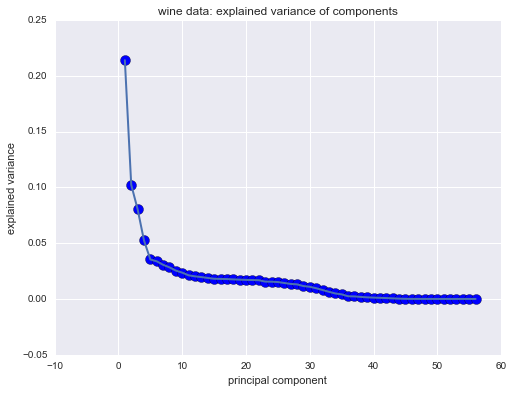

In [88]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, Xs.shape[1]+1), Xs_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, Xs.shape[1]+1), Xs_pca.explained_variance_ratio_, s=100)
ax.set_title('wine data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

In [89]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

In [90]:
Xs_pa = horn_parallel_analysis(Xs.shape, percentile=95)
Xs_pa

array([  4.08888355e+00,   3.68568242e+00,   3.36330069e+00,
         3.15604359e+00,   2.94053629e+00,   2.74623565e+00,
         2.60246184e+00,   2.45759610e+00,   2.31749636e+00,
         2.18662798e+00,   2.05411342e+00,   1.94779363e+00,
         1.84129970e+00,   1.74480708e+00,   1.64324344e+00,
         1.54667083e+00,   1.45423715e+00,   1.37767243e+00,
         1.29871949e+00,   1.21774340e+00,   1.14840531e+00,
         1.08129123e+00,   1.00686204e+00,   9.46611511e-01,
         8.85480625e-01,   8.23813889e-01,   7.71460552e-01,
         7.13519806e-01,   6.64253567e-01,   6.11614791e-01,
         5.63139990e-01,   5.21191437e-01,   4.81975450e-01,
         4.35225772e-01,   3.96810621e-01,   3.60992013e-01,
         3.28026748e-01,   2.93438239e-01,   2.63254890e-01,
         2.32870159e-01,   2.04460565e-01,   1.80786976e-01,
         1.56961318e-01,   1.33609889e-01,   1.14277517e-01,
         9.48105324e-02,   7.65397482e-02,   6.20290120e-02,
         4.77758747e-02,

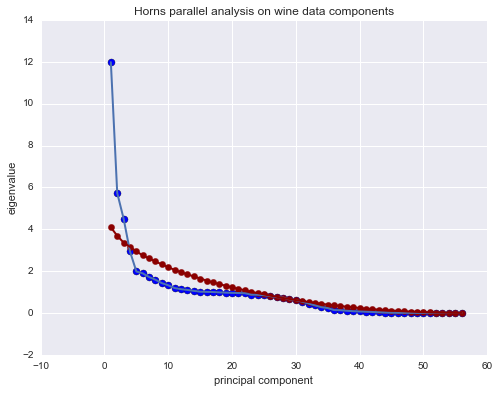

In [91]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, Xs.shape[1]+1), Xs_pca.explained_variance_, lw=2)
ax.scatter(range(1, Xs.shape[1]+1), Xs_pca.explained_variance_, s=50)

ax.plot(range(1, len(Xs_pa)+1), Xs_pa, lw=2, color='darkred')
ax.scatter(range(1, len(Xs_pa)+1), Xs_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on wine data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()

In [92]:
columns_ = Xs_pcs_df.columns.tolist()
ypc = Xs_pcs_df.loan_status.values
Xpc = Xs_pcs_df[[i for i in columns_ if i<'PC37']]
Xpc = Xpc.values
np.size(Xpc[0])

30

In [93]:
model.fit(Xpc, ypc)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [47]:
yt_prob_pred = model.predict_proba(Xpc)

In [50]:
threshold_adjusted_test_preds = np.where(yt_prob_pred>=0.9, 1, 0)

In [51]:
test_predictions = threshold_adjusted_test_preds[:,1]